In [4]:
import sys
import time
import threading
import numpy as np
import os

In [5]:
%run NeuralNetwork_Go.ipynb # Neural Network
%run GoGame.ipynb # Game
%run MCTS_Go.ipynb # MCTS
%run AlphaZero_Go.ipynb # Statistics

### To test only the game - Player vs Player

In [13]:
# Function to get a player's action from the input
def get_player_action(player, valid_moves, action_queue, continue_waiting):
    try: # Try to get a valid action from the player
        while continue_waiting[0]: # Wait for the player to enter a valid action
            print(f"Player {player}'s turn: ", end="", flush=True) # Flush the print buffer to ensure the prompt is displayed
            action = input() # Get the player's input
            if action: # Check if the input is not empty
                action = int(action) # Convert the input to an integer
                if action in valid_moves: # Check if the input is a valid move
                    action_queue.append(action) # Add the action to the queue
                    break # Exit the loop
            time.sleep(0.5)  # Short sleep to prevent busy waiting
    except ValueError: # Catch invalid input    
        print("Invalid input, please enter a number.") # Print an error message

player = 1 # Player to start the game
MAX_MOVE_TIME = 30  # Maximum time for a move in seconds

# Main loop for the game
while True: 
    print("Choose the dimension of the board: 7 - 7*7 or 9 - 9*9") 
    dimension = int(input()) # Get the player's input
    if dimension == 7 or dimension == 9: # Check if the input is a valid dimension
        game = GoGame(dimension) # Initialize the game
        state = game.get_initial_state() # Get the initial state

        # Main loop for the game turns
        while True:
            print("Board State:") 
            print(state) # Print the current state
            valid_moves = game.get_valid_moves(state, player) # Get the valid moves for the current player
            print("valid moves", valid_moves) # Print the valid moves
            print("pass_count: ", game.pass_count) # Print the number of consecutive passes

            start_time = time.time()  # Start the move timer
            action_queue = [] # Queue to store the player's action
            continue_waiting = [True] # Flag to signal the input thread to continue waiting for input
            input_thread = threading.Thread(target=get_player_action, args=(player, valid_moves, action_queue, continue_waiting)) # Create a thread to get the player's input
            input_thread.start() # Start the thread

            next_notification_time = MAX_MOVE_TIME # Time for the next notification
             
            while time.time() - start_time < MAX_MOVE_TIME: # Wait for the player to make a move
                current_time = time.time() # Get the current time
                elapsed_time = current_time - start_time # Calculate the elapsed time
                if elapsed_time < next_notification_time and elapsed_time >= next_notification_time - 5: # Check if it's time to notify the player
                    print(f"Remaining time: {next_notification_time - elapsed_time:.2f} seconds") # Print the remaining time
                    next_notification_time -= 5 # Update the next notification time

                if not input_thread.is_alive(): # Check if the input thread has finished
                    break  # Exit the loop if the player has made a move

            if input_thread.is_alive(): # Check if the input thread is still alive
                continue_waiting[0] = False  # Signal the thread to stop waiting for input
                input_thread.join()  # Ensure the thread completes
                print(f"Time's up! Switching to Player {-player}.") # Print a message to notify the player
                player = -player # Switch players
                continue  # Skip to the next player without updating the state

            if action_queue: # Check if the player has made a move
                action = action_queue.pop(0) # Get the player's action
                is_valid_move = game.is_valid_move(action, state, player) # Check if the action is valid
 
                if not is_valid_move: # Check if the action is not valid
                    print("Please select a valid move") # Print an error message
                    continue # Skip to the next player without updating the state

                state = game.get_next_state(state, action, player) # Update the state
                value, winner, is_terminal = game.get_value_and_terminated(state, action, player) # Check if the game has ended

                if is_terminal: # Check if the game has ended
                    print(state) # Print the final state
                    if value == 1: # Check if someone won
                        print(winner, "won") # Print a message to notify the player
                    else: # It's a draw
                        print("draw") # Print a message to notify the player
                    break # Exit the game loop

            player = -player  # Switch players

    else: # Invalid dimension 
        print("Select a valid dimension") # Print an error message
        continue # Skip to the next player without updating the state

Choose the dimension of the board: 7 - 7*7 or 9 - 9*9
7
Board State:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
valid moves [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 81]
pass_count:  0
Player 1's turn: 0
Board State:
[[1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
valid moves [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 81]
pass_count:  0
Player -1's turn: 

KeyboardInterrupt: 

### To test the game with MCTS - Player vs MCTS

### To test the nn

If you want to test the RNN, change model to : GoRNN(game, 4, 64, device)

Checking liberties for stone at (0, 2)
Captured stones: []
Applying move at row 0, column 2 by player 1
Checking liberties for stone at (0, 7)
Captured stones: []
Applying move at row 0, column 7 by player -1
[[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 0. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 

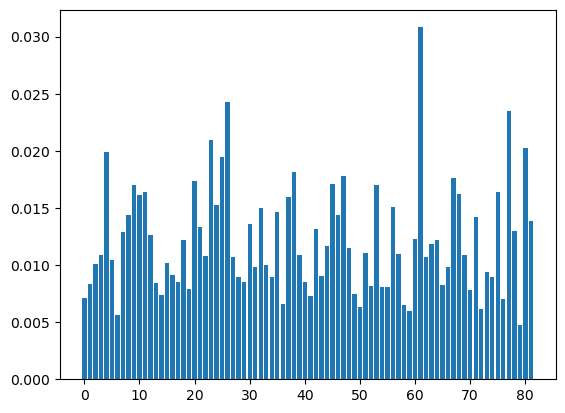

In [7]:

import matplotlib.pyplot as plt

game = GoGame(9) # 9 - dimension
state = game.get_initial_state() # Get the initial state
state = game.get_next_state(state, 2, 1) # 2 - action, 1 - player
state = game.get_next_state(state, 7, -1) # 7 - action, -1 - player

encoded_state = game.get_encoded_state(state)  # Get the encoded state
print(encoded_state) # Print the encoded state

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if GPU is available

tensor_state = torch.tensor(encoded_state).unsqueeze(0) # Convert the encoded state to a tensor and add a batch dimension (batch size = 1)
model = ResNet(game, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)
print(tensor_state) # Print the tensor state
policy, value= model(tensor_state) # Get the policy and value predictions
value = value.item() # Get the value as a scalar
policy = torch.softmax(policy, axis=1).squeeze(0).detach().cpu().numpy() # Convert the policy to a numpy array
print("value: ", value) # Print the value
np.set_printoptions(threshold=np.inf) # Print the full policy array
print("policy: ", policy) # Print the policy

plt.bar(range(game.action_size+1), policy) # Plot the policy
plt.show() # Show the plot

### To test the game with MCTS

For this one you need to uncomment the version of MCTS commented on MCTS_Go.ipynb

Do not forget to comment the current version

In [ ]:
game = GoGame(9) # 9 - dimension
player = 1 # Player to start the game
state = game.get_initial_state() # Get the initial state

args = {
    'C' : 1.41,  # Exploration constant for the UCT formula 
    'num_searches': 5 # Number of searches to run for each move
}
    
mcts = MCTS(game, args, player) # Initialize the MCTS

# Main loop for the game
while True: 
    
    game.reset_time() # Reset the game time
    
    if player == 1: # Check if it's the player's turn
        print("Board State:") 
        print(state) # Print the current state
        valid_moves = game.get_valid_moves(state, player) # Get the valid moves for the current player
        print("valid moves", valid_moves) # Print the valid moves
        
        print("If you would like to pass, select 81 otherwise choose the cell you want") 
        action = int(input(f"{player}: ")) # Get the player's input
        
        is_valid_move = game.is_valid_move(action, state, player) # Check if the action is valid
        
        if not is_valid_move: # Check if the action is not valid
            print("Please select a valid move") # Print an error message
            continue 
        else: # Valid move
            state = game.get_next_state(state, action, player) # Update the state
            value, winner, is_terminal = game.get_value_and_terminated(state, action, player) # Check if the game has ended

    else: # AI's turn
        # neutral_state = game.change_perspective(state, player) # Change the perspective of the state
        mcts_probs = mcts.search(state) # Get the MCTS probabilities
        action = np.argmax(mcts_probs) # Get the action with the highest probability

        state = game.get_next_state(state, action, player) # Update the state
        value, winner, is_terminal = game.get_value_and_terminated(state, action, player) # Check if the game has ended
    
    if action == 81: # Check if the player passed
        game.pass_count += 1 # Increment the number of consecutive passes

    if is_terminal: # Check if the game has ended
        if value == 1: # Check if someone won
            print(winner, "won") # Print a message to notify the player
        else: # It's a draw
            print("draw") # Print a message to notify the player
        break
    
    player = -player # Switch players

### To test the game with the nn

In [40]:
# Function to get a player's action from the input
def get_player_action(player, valid_moves, action_queue):
    try:
        print(f"Player {player}'s turn: ", end="", flush=True)
        action = input()
        if action:
            action = int(action)
            if action in valid_moves:
                action_queue.append(action)
    except ValueError:
        print("Invalid input, please enter a number.")

# Function for AI to make a move using MCTS
def get_ai_action(mcts, state):
    mcts_probs = mcts.search(state)
    action = np.argmax(mcts_probs)
    return action

# Choose the dimension of the board
print("Choose the dimension of the board: 7 - 7*7 or 9 - 9*9") 
dimension = int(input())
if dimension not in [7, 9]:
    print("Select a valid dimension")
    # Exit or restart the loop
else:
    game = GoGame(dimension)
    state = game.get_initial_state()
    
    # MCTS arguments
    args = {
        'C': 2,  # Exploration constant
        'num_searches': 10  # Number of searches per move
    }
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if GPU is available

    # Initialize MCTS for the AI player
    model = ResNet(game, 4, 64, device)
    model.eval()
    mcts = MCTS(game, args, -1, model)  # Assuming AI is player -1

    player = 1  # Human player starts

    # Game loop
    while True:
        print("Board State:")
        print(state)
        valid_moves = game.get_valid_moves(state, player)
        print("valid moves", valid_moves)

        if player == 1:  # Human player
            action_queue = []
            get_player_action(player, valid_moves, action_queue)
            action = action_queue.pop(0) if action_queue else 81  # Default to pass if no input

        else:  # AI player
            action = get_ai_action(mcts, state)

        # Update the game state
        state = game.get_next_state(state, action, player)
        value, winner, is_terminal = game.get_value_and_terminated(state, action, player)

        if is_terminal:
            print(state)
            if value == 1:
                print(winner, "won")
            else:
                print("draw")
            break

        player = -player  # Switch players


Choose the dimension of the board: 7 - 7*7 or 9 - 9*9


KeyboardInterrupt: Interrupted by user

In [22]:
## game = GoGame(9) # 9 - dimension

player = 1 # Player to start the game
state = game.get_initial_state() # Get the initial state

args = {
    'C' : 2,  # Exploration constant for the UCT formula
    'num_searches': 10 # Number of searches to run for each move
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if GPU is available

model = ResNet(game, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)
model.eval() # Set the model to evaluation mode
mcts = MCTS(game, args, -1, model) # Initialize the MCTS

# Main loop for the game
while True:
    game.reset_time() # Reset the game time
    
    if player == 1: # Check if it's the player's turn    
         
        valid_moves = game.get_valid_moves(state, player)  # Get valid moves
        print("valid moves", valid_moves)

        print("If you would like to pass, select 81 otherwise choose the cell you want")
        action = int(input(f"Player {player}: "))  # Get player's action

        if action in valid_moves:  # Check if the action is valid
            state = game.get_next_state(state, action, player)  # Update the state
            print("Board State after your move:")
            print(state)
        else:
            print("Invalid move, please select a valid move")
            continue  # Skip the rest of the loop and prompt for move again
            

    else: # AI's turn
        neutral_state = game.change_perspective(state, player) # Change the perspective of the state

        mcts_probs = mcts.search(neutral_state) # Get the MCTS probabilities
        action = np.argmax(mcts_probs) # Get the action with the highest probability

        state = game.get_next_state(state, action, player) # Update the state
     
    print("Board State:") 
    print(state) # Print the current state
    value, winner, is_terminal = game.get_value_and_terminated(state, action, player) # Check if the game has ended
    
    if action == 81: # Check if the player passed
        game.pass_count += 1 # Increment the number of consecutive passes

    if is_terminal: # Check if the game has ended
        if value == 1: # Check if someone won
            print(winner, "won") # Print a message to notify the player
        else: # It's a draw
            print("draw") # Print a message to notify the player
        break
    
    player = -player # Switch players

Initialized MCTS
valid moves [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
If you would like to pass, select 81 otherwise choose the cell you want


KeyboardInterrupt: Interrupted by user

### To train with the AlphaZero

##### Board Dimension = 7

In [10]:
game = GoGame(7) # 7 - dimension

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if GPU is available

state = game.get_initial_state() # Get the initial state

input_size = 7 * 7 # Grid size
hidden_size = 128 # Size of the hidden layer in the RNN
num_layers = 2 # Number of layers in the RNN
policy_size = game.action_size # Number of possible actions
value_size = 1 # Size of the value output
model = ResNet(game, 4, 64, device) # Initialize the model

torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Initialize the optimizer with weight decay to prevent overfitting (L2 regularization) 

# Training parameters
args = { 
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 3, # Number of searches to run for each move
    'num_iterations': 3, # Number of iterations to run the training loop
    'num_selfPlay_iterations': 20, # Number of self-play games to play in each iteration
    'num_epochs': 4, # Number of epochs to train the model
    'batch_size': 128, # Batch size for training
    'epsilon': 0.25, # Fraction of random moves to play during self-play
    'alpha': 0.3 # Weight of the value loss in the total loss
}

alphaZero = AlphaZero(model, optimizer, game, args) # Initialize the AlphaZero object
alphaZero.learn() # Run the training loop

Initialized MCTS


  0%|          | 0/20 [00:00<?, ?it/s]

Initialized MCTS


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2592 and 1568x50)

##### Board Dimension = 9

In [9]:
game = GoGame(9) # 9 - dimension

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if GPU is available

state = game.get_initial_state() # Get the initial state

model = ResNet(game, 4, 64, device) # Initialize the model

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Initialize the optimizer with weight decay to prevent overfitting (L2 regularization)

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 3, # Number of searches to run for each move
    'num_iterations': 3, # Number of iterations to run the training loop
    'num_selfPlay_iterations': 5, # Number of self-play games to play in each iteration
    'num_epochs': 4, # Number of epochs to train the model
    'batch_size': 64, # Batch size for training
    'epsilon': 0.25, # Fraction of random moves to play during self-play
    'alpha': 0.3 # Weight of the value loss in the total loss
}

alphaZero = AlphaZero(model, optimizer, game, args) # Initialize the AlphaZero object
alphaZero.learn() # Run the training loop

Initialized MCTS


  0%|          | 0/5 [00:00<?, ?it/s]

Initialized MCTS
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

KeyboardInterrupt: 